# Contents
1. Import Libraries & Data Set
2. Create a Product Category Column 
3. Create a Product Category Visualization 
4. Create a Visualization for Orders by Department 
5. Create a Visualization for Loyalty Group spending 
6. Create a visualization for spending by Region 

# Import Libraries & Data Set 

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create Path 
path = r'/Users/ATeam/Desktop/CF/Achievement  4 - Python/02 Data/Prepared Data/final_IC_data.pkl'

In [5]:
# Import data set
df_IC = pd.read_pickle(os.path.join(path))

# Create a Product Category Column 

In [6]:
# Check statistics of prices column 
df_IC['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [7]:
# Create a product_category column
df_IC.loc[df_IC['prices'] < 9, 
         'product_category'] = 'low-priced item'
df_IC.loc[(df_IC['prices'] > 9) & (df_IC['prices'] < 14), 
         'product_category'] = 'mid-priced item'
df_IC.loc[df_IC['prices'] >= 14, 
         'product_category'] = 'high-priced item'

In [8]:
#Check product_category column 
df_IC['product_category'].value_counts()

product_category
low-priced item     19795875
mid-priced item      9799233
high-priced item     2581175
Name: count, dtype: int64

# Create a Product Category Visualization 

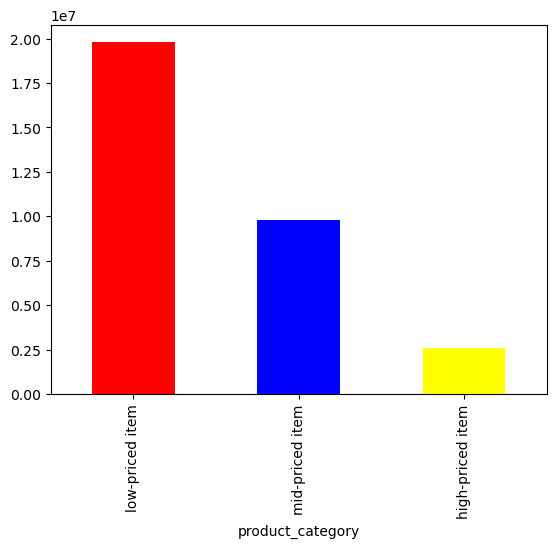

In [9]:
# Create a bar chart grouped by product category
bar = df_IC['product_category'].value_counts().plot.bar(color = ['red', 'blue', 'yellow'])

In [10]:
# Create a path 
path = r'/Users/ATeam/Desktop/CF/Achievement  4 - Python'

In [11]:
#Export the bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_product_categories.png'))

# Create a Visualization for Orders by department 

In [23]:
#Create an algorithm
np.random.seed(4)
dev = np.random.rand(len(df_IC)) <= 0.7

In [26]:
# Create sample sets
big = df_IC[dev]
small = df_IC[~dev]

In [27]:
df_IC2 = small[['department_id', 'Customer Profile']]

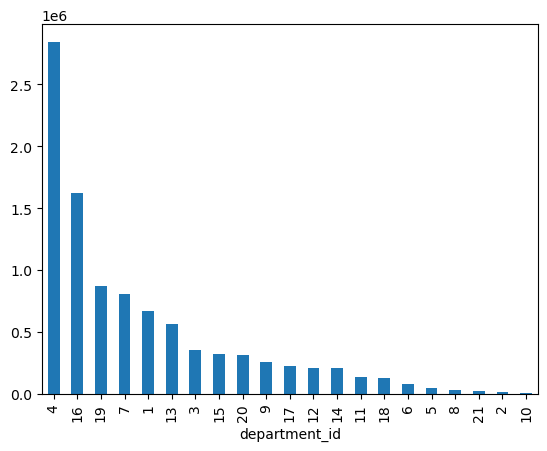

In [30]:
bar = df_IC2['department_id'].value_counts().plot.bar()

In [33]:
# Export bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department.png'))

In [35]:
# Expanding the small data set
df_IC3 = small

In [36]:
# Show all column headers command
pd.set_option('display.max_columns', None)

In [37]:
#Check data frame columns 
df_IC3.head()

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id  order_number  \
0              0             0   2539329        1             1   
2              2             2    473747        1             3   
3              3             3   2254736        1             4   
6              6             6    550135        1             7   
10             0             0   2539329        1             1   

    orders_day_of_week  hour_of_day_order_placed  days_since_prior_order  \
0                    2                         8                     NaN   
2                    3                        12                    21.0   
3                    4                         7                    29.0   
6                    1                         9                    20.0   
10                   2                         8                     NaN   

    first_order  product_id  add_to_cart_order  reordered _merge  \
0          True         196                  1          0   both   
2         False         196                  1          1   both   
3         False         196                  1          1   both   
6         False         196                  1          1   both   
10         True       14084                  2          0   both   

    Unnamed: 0_y                             product_name  aisle_id  \
0            195                                     Soda        77   
2            195                                     Soda        77   
3            195                                     Soda        77   
6            195                                     Soda        77   
10         14084  Organic Unsweetened Vanilla Almond Milk        91   

    department_id  prices    price_range_loc    busiest days  \
0               7     9.0  Mid-range product  Regularly busy   
2               7     9.0  Mid-range product  Regularly busy   
3               7     9.0  Mid-range product      Least busy   
6               7     9.0  Mid-range product  Regularly busy   
10             16    12.5  Mid-range product  Regularly busy   

   busiest_period_of_time  max_order  loyalty_flag  avg_order_price  \
0          Average orders         10  New Customer         6.367797   
2             Most orders         10  New Customer         6.367797   
3          Average orders         10  New Customer         6.367797   
6             Most orders         10  New Customer         6.367797   
10         Average orders         10  New Customer         6.367797   

   spending_flag  median_days_between_orders         frequency_flag  Gender  \
0    Low Spender                        20.5  Non-frequent customer  Female   
2    Low Spender                        20.5  Non-frequent customer  Female   
3    Low Spender                        20.5  Non-frequent customer  Female   
6    Low Spender                        20.5  Non-frequent customer  Female   
10   Low Spender                        20.5  Non-frequent customer  Female   

      STATE  Age date_joined  number_of_dependants fam_status  income Region  \
0   Alabama   31   2/17/2019                     3    married   40423  South   
2   Alabama   31   2/17/2019                     3    married   40423  South   
3   Alabama   31   2/17/2019                     3    married   40423  South   
6   Alabama   31   2/17/2019                     3    married   40423  South   
10  Alabama   31   2/17/2019                     3    married   40423  South   

         customer_activity Customer Profile product_category  
0   High-activity customer     Young Parent              NaN  
2   High-activity customer     Young Parent              NaN  
3   High-activity customer     Young Parent              NaN  
6   High-activity customer     Young Parent              NaN  
10  High-activity customer     Young Parent  mid-priced item

# Create a visualization for spending by loyalty groups

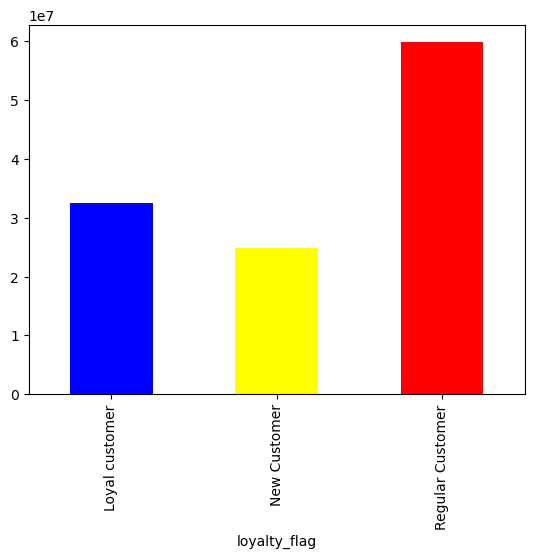

In [45]:
bar = df_IC2.groupby('loyalty_flag')['prices'].sum().plot.bar(color = ['blue', 'yellow', 'red'])

In [46]:
# Export bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spending.png'))

# Create a visualization for spending by Region 

In [52]:
# Create a bar chart for sales by region
bar = df_IC2.groupby('Region')['prices'].sum().plot.bar(color = ['blue', 'yellow', 'red', 'green'])

In [54]:
# Export bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_by_region.png'))